Find out where you are.

In [1]:
pwd

'C:\\Users\\s1102045\\OneDrive - Universität Salzburg\\Classes\\2nd semester\\Software Development\\Practical\\PLUS_softwaredev_2024_material\\class_notebook'

As talked about last week, you can also do the following:

In [2]:
import os
where_i_am = os.getcwd()

Create a string that contains the path to the sample.tif

In [3]:
import os
# Change these strings to fit where you know the geotiff_sample repo is!
where_the_geotiff_is = "../images/sample.tif"
print(where_the_geotiff_is)

../images/sample.tif


Check if it is a file

In [4]:
os.path.isfile(where_the_geotiff_is)

True

Now, let's have a look at gdal.

See here for more info: https://gdal.org/api/index.html#python-api

And here for an applied overview: http://slides.hannahaugustin.at/maptime/GDAL_intro/

In [5]:
import sys
from osgeo import gdal

In [6]:
# Check version of python:
print(sys.version)

# We can check which version we're running by printing the "__version__" variable
print("GDAL's version is: " + gdal.__version__)

# This shows where the version of GDAL is located (in this case, in a conda environment)
print(gdal)

# This allows GDAL to throw Python Exceptions
gdal.UseExceptions()

3.9.18 [MSC v.1931 64 bit (AMD64)]
GDAL's version is: 3.7.0e
<module 'osgeo.gdal' from 'C:\\Program Files\\ArcGIS\\Pro\\bin\\Python\\envs\\arcgispro-py3\\lib\\site-packages\\osgeo\\gdal.py'>


In [7]:
info_options = gdal.InfoOptions(computeMinMax=True, stats=True)

print(gdal.Info(where_the_geotiff_is, options=info_options))

Driver: GTiff/GeoTIFF
Files: ../images/sample.tif
       ../images/sample.tif.aux.xml
Size is 1001, 1001
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 31N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["Transverse Mercator",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",3,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre"

In [9]:
print(info_options)

(<osgeo.gdal.GDALInfoOptions; proxy of <Swig Object of type 'GDALInfoOptions *' at 0x00000218B4F2C3F0> >, 'text', True)


In [10]:
# Open the file as a GDAL Dataset object.
in_ds = gdal.Open(where_the_geotiff_is, gdal.GA_ReadOnly)
print(in_ds)

# Close GDAL Dataset object.
in_ds = None

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000218B220ED80> >


In [11]:
in_ds = gdal.Open(where_the_geotiff_is, gdal.GA_ReadOnly)

# Find the number of bands in the dataset object.
print("[ NUMBER OF BANDS ] = ", in_ds.RasterCount)

# Create a GDAL raster band object from the only band in the dataset object.
in_band = in_ds.GetRasterBand(1)

print("[ BAND DATA TYPE ] = ", gdal.GetDataTypeName(in_band.DataType))
print("[ NO DATA VALUE ] = ", in_band.GetNoDataValue())

# Compute statistics if needed.
if in_band.GetMinimum() is None or in_band.GetMaximum()is None:
    in_band.ComputeStatistics(0)
    print("Statistics computed.")

print("[ OVERALL STATS ] = ", in_band.GetMetadata())

print("[ MIN ] = ", in_band.GetMinimum())
print("[ MAX ] = ", in_band.GetMaximum())
print("[ SCALE ] = ", in_band.GetScale())

# Close everything.
in_ds = None
in_band = None

[ NUMBER OF BANDS ] =  3
[ BAND DATA TYPE ] =  UInt16
[ NO DATA VALUE ] =  None
[ OVERALL STATS ] =  {'STATISTICS_MAXIMUM': '10964', 'STATISTICS_MEAN': '1009.3248849053', 'STATISTICS_MINIMUM': '0', 'STATISTICS_STDDEV': '311.3070876736', 'STATISTICS_VALID_PERCENT': '100'}
[ MIN ] =  0.0
[ MAX ] =  10964.0
[ SCALE ] =  None


Now, let's have a look at a specific image using rasterio. Rasterio is essentially what is called a wrapper for GDAL. This basically means that one if its main goals is to simplify using GDAL. See more on the philosophy here: https://rasterio.readthedocs.io/en/latest/intro.html

First, let's open the file using rasterio.open() (See https://rasterio.readthedocs.io/en/latest/api/rasterio.html#rasterio.open)

By default, GDAL drivers are tested sequentially until one works. You can simplify this by specifying a driver, if you like. Drivers can be found here: https://gdal.org/drivers/raster/index.html

In [ ]:
# Some of the next few cells are taken from this tutorial: https://medium.com/@mommermiscience/dealing-with-geospatial-raster-data-in-python-with-rasterio-775e5ba0c9f5
# and also from this one:
# First import the package.
import rasterio

In [ ]:
# We can check which version we're running by printing the "__version__" variable
print("rasterio's version is: " + rasterio.__version__)
print(rasterio)

First, try to open the file using the wrong driver to see what happens:

In [20]:
tif_dataset = rasterio.open(where_the_geotiff_is, driver="BAG")

RasterioIOError: 'C:/Users/b1041827/repos/geotiff_sample/sample.tif' not recognized as a supported file format.

(Note, generally it is best practice in scripts to open files using "with" so that you don't have to worry about explicitly closing the files... For examples, see the rasterio.open() dics here: https://rasterio.readthedocs.io/en/latest/api/rasterio.html#rasterio.open)

In [22]:
tif_dataset = rasterio.open(where_the_geotiff_is, driver="GTiff")

Let's investigate the python object we just created.

In [23]:
print(tif_dataset)

<open DatasetReader name='C:/Users/b1041827/repos/geotiff_sample/sample.tif' mode='r'>


Now, let's have a look at our opened object. Let's check the Coordinate Reference System:

In [24]:
tif_dataset.crs

CRS.from_epsg(32631)

We have been given a rasterio.crs.CRS() object that includes an EPSG code. These can be explored at https://epsg.io, like here https://epsg.io/32631

In [25]:
print(tif_dataset.crs)

EPSG:32631


Practice creating CRS objects using rasterio in a few different ways. See here for more info: https://rasterio.readthedocs.io/en/latest/api/rasterio.crs.html

In [26]:
# The from_string method takes a variety of input.

crs = rasterio.crs.CRS.from_string("EPSG:3035")
print(crs)

EPSG:3035


In [27]:
# EPSG codes may be used with the from_epsg method.
crs = rasterio.crs.CRS.from_epsg(3035)
print(crs)

EPSG:3035


In [28]:
# The from_proj4 method takes PROJ strings as an argument
crs = rasterio.crs.CRS.from_proj4(proj="+proj=utm +zone=31 +datum=WGS84 +units=m +no_defs ")
print(crs)

EPSG:32631


Check the bounds of the dataset in the CRS coordinates.

In [29]:
tif_dataset.bounds

BoundingBox(left=590520.0, bottom=5780620.0, right=600530.0, top=5790630.0)

In [30]:
print(tif_dataset.bounds)

BoundingBox(left=590520.0, bottom=5780620.0, right=600530.0, top=5790630.0)


Checkout the affine transformation parameters. See https://github.com/rasterio/affine for more details...

In [31]:
tif_dataset.transform

Affine(10.0, 0.0, 590520.0,
       0.0, -10.0, 5790630.0)

In [32]:
# Read the dataset's valid data mask as a ndarray.
mask = tif_dataset.dataset_mask()
print(mask)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [33]:
import rasterio.features
import rasterio.warp
# Example from rasterio docs: https://rasterio.readthedocs.io/en/latest/index.html
# Extract feature shapes and values from the array.
for geom, val in rasterio.features.shapes(mask, transform=tif_dataset.transform):
    # Transform shapes from the dataset's own coordinate
    # reference system to CRS84 (EPSG:4326).
    geom = rasterio.warp.transform_geom(tif_dataset.crs, 'EPSG:4326', geom, precision=6)
    print(geom)

{'type': 'Polygon', 'coordinates': [[[4.326247, 52.258604], [4.32357, 52.168631], [4.469885, 52.166899], [4.472858, 52.256865], [4.326247, 52.258604]]]}


Ok, now, let's explore some of the base info we have about our dataset based on what we can access (see info on the base class here: https://rasterio.readthedocs.io/en/latest/api/rasterio._base.html )

In [34]:
tif_dataset.res

(10.0, 10.0)

In [35]:
tif_dataset.width

1001

In [36]:
tif_dataset.height

1001

In [37]:
tif_dataset.driver

'GTiff'

In [38]:
tif_dataset.interleaving

<Interleaving.pixel: 'PIXEL'>

In [39]:
tif_dataset.mode

'r'

In [40]:
tif_dataset.count

3

In [41]:
tif_dataset.descriptions

(None, None, None)

In [42]:
tif_dataset.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1001,
 'height': 1001,
 'count': 3,
 'crs': CRS.from_epsg(32631),
 'transform': Affine(10.0, 0.0, 590520.0,
        0.0, -10.0, 5790630.0)}

Now let's look closer at the bands that are available. First, let's see what the file contains:

In [43]:
tif_dataset.indexes

(1, 2, 3)

In [44]:
img = tif_dataset.read(1)

In [45]:
img

array([[   0,  799,  788, ..., 1061, 1433, 2430],
       [   0,  774,  792, ..., 1027, 1125, 1733],
       [   0,  797,  801, ..., 1046, 1040, 1100],
       ...,
       [   0,  826,  837, ..., 1562, 1489, 1740],
       [   0,  804,  825, ..., 1553, 1582, 1619],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16)

In [46]:
type(img)

numpy.ndarray

So, we have a numpy ndarray. What is that? See here: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html

If we look at the documentation, we can try to access a few things...

In [47]:
img.shape

(1001, 1001)

In [48]:
img.dtype

dtype('uint16')

In [49]:
img.mean

<function ndarray.mean>

In [50]:
print(img.mean)

<built-in method mean of numpy.ndarray object at 0x0000021E3AA1B390>


In [51]:
img.mean()

1009.3248849053044

In [52]:
print(img.max())

10964


In [53]:
print(img.min())

0


In [54]:
print(img.std())

311.3070876735991


Let's import numpy... Remember, you can also import using an alias.

In [55]:
# No alias
import numpy
print(numpy.__version__)

# Alias or rename to "np" -- a very common practice
import numpy as np
print(np.__version__)


1.22.3
1.22.3


And let's also use rasterio's plotting functionality. See here for more info and examples: https://rasterio.readthedocs.io/en/latest/topics/plotting.html?highlight=plotting

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


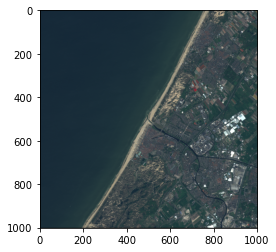

<AxesSubplot:>

In [56]:
from rasterio.plot import show, adjust_band
# this bit of jupyter magic allows matplotlib to plot inline in a jupyter notebook
# See here: https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline  

imgdata = np.array([adjust_band(tif_dataset.read(i)) for i in (3,2,1)])
show(imgdata*3)  # factor 3 to increase brightness

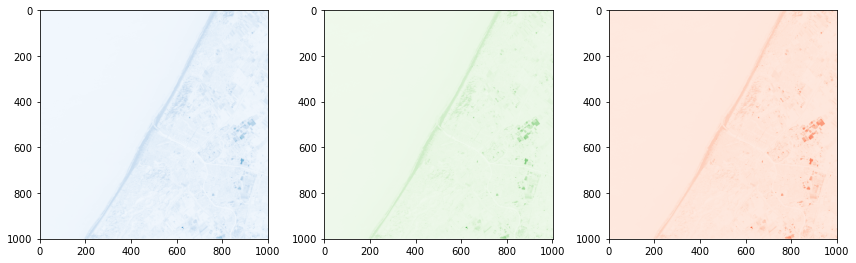

In [57]:
from rasterio import plot
import matplotlib.pyplot as plt
#multiple band representation
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(np.array(adjust_band(tif_dataset.read(3))), ax=ax1, cmap='Blues')
plot.show(np.array(adjust_band(tif_dataset.read(2))), ax=ax2, cmap='Greens')
plot.show(np.array(adjust_band(tif_dataset.read(1))), ax=ax3, cmap='Reds')
fig.tight_layout()

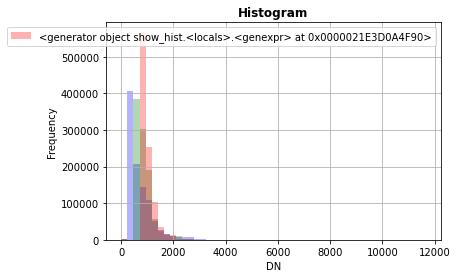

In [58]:
#generate histogram
plot.show_hist(tif_dataset, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

... for those of you who are faster, you can continue working through this tutorial, which goes on to include transforming the CRS, cropping the image, resampling the image, and reprojecting the image: https://medium.com/@mommermiscience/dealing-with-geospatial-raster-data-in-python-with-rasterio-775e5ba0c9f5

In [59]:
import sentinelhub
#
# For those who have a sentinelhub account, you can try to navigate one of the tutorials here and access imagery (you will need to install the sentinhelhub python package somehow first...):
# From https://sentinelhub-py.readthedocs.io/en/latest/sh.html
#